### 12_July_Batch_Normalization.ipynb

### Batch_Normalization

### Theory and Concepts
1. Explain the concept of batch normalization in the context of Artificial Neural Networks.
2. Describe the benefits of using batch normalization during training.
3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

### Impementation
1. Choose a dataset of your choice (e.g., MNIST, CIAR-0) and pre-process it.
2. Implement a simple feed forward neural network using any deep learning framework/library (e.g.Tensorflow, xyTorch).
3. Train the neural network on the chosen dataset without using batch normalization
4. Implement batch normalization layers in the neural network and train the model again.
5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.
6. Discuss the impact of batch normalization on the training process and the performance of the neural network.

### Experimentation and Analysis
1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.
2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

## Part 1
### Theory and Concepts
1. Explain the concept of batch normalization in the context of Artificial Neural Networks.
2. Describe the benefits of using batch normalization during training.
3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

### Q1. Explain the concept of batch normalization in the context of Artificial Neural Networks.

Batch normalization is a technique used in artificial neural networks to improve the training stability and speed of convergence. It involves normalizing the inputs of each layer within a mini-batch during training. Here's an explanation of the concept of batch normalization and how it works:

 **Concept of Batch Normalization:**

1. **Normalization within Mini-Batch:**

- In traditional neural network training, the distribution of inputs to each layer can change during training, which can slow down training and make it more challenging to converge. Batch normalization addresses this issue by normalizing the inputs within each mini-batch.
- For each mini-batch of training data, batch normalization scales and shifts the inputs, so they have a mean of zero and a standard deviation of one. This normalization is applied independently to each feature dimension.

2. **Learnable Parameters:**

- In addition to scaling and shifting the normalized values, batch normalization introduces two learnable parameters for each feature: a scale parameter (gamma) and an offset parameter (beta).
- These parameters are learned during training and allow the network to adapt the normalization to the specific requirements of the task.

3. **Applying Batch Normalization:**

- Batch normalization is typically applied right after the linear transformation (e.g., weights and biases) and before the activation function in each layer of a neural network.
- The process can be summarized as follows for a given layer:
- Compute the mean and standard deviation of the mini-batch for each feature dimension.
- Normalize the features using the mean and standard deviation.
- Scale and shift the normalized features using the learned gamma and beta parameters.
- Pass the scaled and shifted values through the activation function.

- Use Cases:

1. Batch normalization is commonly used in deep neural networks, including convolutional neural networks (CNNs) and recurrent neural networks (RNNs).
2. It is particularly effective in networks with many layers, as it helps mitigate the vanishing and exploding gradient problems and enables deeper networks to be trained more effectively.

### Q2. Describe the benefits of using batch normalization during training.

Using batch normalization during training offers several benefits that improve the stability, convergence speed, and overall performance of artificial neural networks. Here are the key advantages of using batch normalization:

1. Stabilized Training:

- Batch normalization helps stabilize the training process by reducing internal covariate shift. This means that the distribution of activations within each layer remains more consistent during training.
- When the distribution of inputs to each layer remains stable, it is easier to train deep networks because the gradients tend to have consistent magnitudes and directions.

2. Faster Convergence:

- Neural networks with batch normalization layers often converge faster than those without it. This can result in shorter training times and quicker deployment of models.
- Faster convergence is particularly noticeable in deep networks with many layers, as batch normalization helps mitigate the vanishing and exploding gradient problems.

3. Improved Gradient Flow:

- Batch normalization reduces the risk of gradients becoming too small (vanishing gradient) or too large (exploding gradient) during back propagation.
- A more stable gradient flow enables smoother weight updates and prevents the network from getting stuck in training.

4. Reduced Sensitivity to Weight Initialization:

- Neural network training can be sensitive to the initial values of weights and biases. Batch normalization reduces this sensitivity by normalizing the inputs within each mini-batch.
- As a result, network architectures are less reliant on careful weight initialization, which can simplify model development and experimentation.

5. Regularization:

- Batch normalization acts as a form of regularization. It adds a source of noise to the mini-batch statistics, which can help prevent over fitting, especially when the batch size is small.
- The noise introduced by batch normalization can be thought of as a mild form of dropout, contributing to improved generalization.

Batch normalization is a crucial technique in modern neural network training. It stabilizes the training process, speeds up convergence, improves gradient flow, and enhances the overall performance and generalization of neural networks. It has become a standard practice in deep learning and is widely used to train more efficient and effective models.

### Q3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

Batch normalization is a technique used in deep learning to improve the stability and performance of neural networks. It involves normalizing the activations of a layer before passing them to the next layer. This helps to reduce the internal covariate shift that can occur in deep neural networks, which can lead to unstable training and poor generalization.

The normalization step in batch normalization involves calculating the mean and variance of the activations for each batch of data. The activations are then normalized by subtracting the mean and dividing by the standard deviation. This results in a normalized activation distribution with a mean of 0 and a standard deviation of 1.

The learnable parameters in batch normalization are the gamma and beta parameters. The gamma parameter is used to scale the normalized activations, while the beta parameter is used to shift the normalized activations. These parameters are learned during training and help to ensure that the normalized activations are properly scaled and centered.

Batch normalization works by reducing the internal covariate shift that can occur in deep neural networks. This helps to stabilize training and improve generalization. Additionally, batch normalization can help to reduce the number of parameters that need to be learned, which can make training more efficient.

Here is a step-by-step explanation of how batch normalization works:

1. The activations for a batch of data are calculated.
2. The mean and variance of the activations are calculated.
3. The activations are normalized by subtracting the mean and dividing by the standard deviation.
4. The normalized activations are scaled by the gamma parameter.
5. The normalized activations are shifted by the beta parameter.
6. The normalized activations are passed to the next layer.


## Part 2

### Impementation
1. Choose a dataset of your choice (e.g., MNIST, CIAR-0) and pre-process it.
2. Implement a simple feed forward neural network using any deep learning framework/library (e.g.Tensorflow, xyTorch).
3. Train the neural network on the chosen dataset without using batch normalization
4. Implement batch normalization layers in the neural network and train the model again.
5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.
6. Discuss the impact of batch normalization on the training process and the performance of the neural network.


### Choose a dataset of your choice (e.g., MNIST, CIAR-0) and pre-process it.

In [1]:
import tensorflow as tf

In [2]:
import keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [4]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


**View 10 labels in train data**

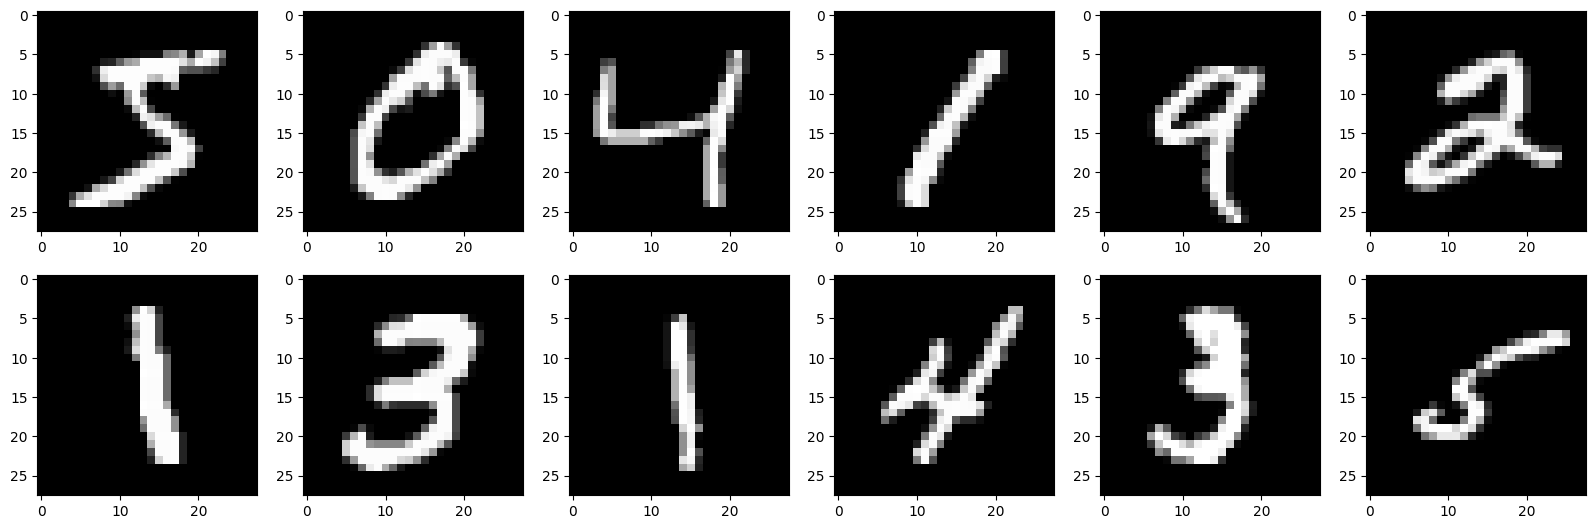

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(6,6,i+1)
    plt.imshow(X_train[i],cmap='gray')
plt.show()

In [6]:
# Preprocess the data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [7]:
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
y_train[:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
y_test[:9]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255  # Normalize pixel values to the range [0, 1]

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255  # Normalize pixel values to the range [0, 1]

train_labels = to_categorical(train_labels)  # One-hot encode the labels
test_labels = to_categorical(test_labels)  # One-hot encode the labels


### Implement a simple feed forward neural network using any deep learning framework/library (e.g.Tensorflow, xyTorch).

In [11]:
# Define the model for ANN model
model = Sequential()

# Adding a simple flatten layer
model.add(Flatten(input_shape=(28,28,1)))

# Adding two Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

In [12]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the neural network on the chosen dataset without using batch normalization

In [14]:
hist1 = model.fit(X_train,y_train,validation_split=0.2,epochs=30)

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3257 - accuracy: 0.9048 - val_loss: 0.1842 - val_accuracy: 0.9456
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1463 - accuracy: 0.9558 - val_loss: 0.1332 - val_accuracy: 0.9594
Epoch 3/30
1500/1500 [==============================] - 1s 894us/step - loss: 0.1060 - accuracy: 0.9676 - val_loss: 0.1152 - val_accuracy: 0.9648
Epoch 4/30
1500/1500 [==============================] - 1s 950us/step - loss: 0.0842 - accuracy: 0.9744 - val_loss: 0.1078 - val_accuracy: 0.9682
Epoch 5/30
1500/1500 [==============================] - 1s 912us/step - loss: 0.0672 - accuracy: 0.9789 - val_loss: 0.1269 - val_accuracy: 0.9621
Epoch 6/30
1500/1500 [==============================] - 1s 892us/step - loss: 0.0562 - accuracy: 0.9822 - val_loss: 0.1017 - val_accuracy: 0.9704
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.0986 - val_a

In [15]:
model.evaluate(X_train,y_train)

1875/1875 [==============================] - 1s 519us/step - loss: 0.0604 - accuracy: 0.9875


[0.0604206845164299, 0.9875166416168213]

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 553us/step - loss: 0.1797 - accuracy: 0.9698


[0.17967793345451355, 0.9697999954223633]

###  Implement batch normalization layers in neural network and train the model again

**Building the model using batch normalization**

In [17]:
from keras.layers import BatchNormalization

# Defining the model
model_with_batch_normalization = Sequential()

# Flattening the layer
model_with_batch_normalization.add(Flatten(input_shape=(28,28,1)))

# Adding 2 dense layer with batch normalization
model_with_batch_normalization.add(Dense(64, activation='relu'))
model_with_batch_normalization.add(BatchNormalization())

model_with_batch_normalization.add(Dense(32, activation='relu'))
model_with_batch_normalization.add(BatchNormalization())

model_with_batch_normalization.add(Dense(10, activation='softmax'))


In [18]:
# compiling the model

model_with_batch_normalization.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [19]:
model_with_batch_normalization.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 10)               

In [20]:
# training the model with trainable parameter
hist2 = model_with_batch_normalization.fit(X_train,y_train,validation_split=0.2,epochs=30)

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3369 - accuracy: 0.9007 - val_loss: 0.1564 - val_accuracy: 0.9530
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1594 - accuracy: 0.9516 - val_loss: 0.1320 - val_accuracy: 0.9615
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1271 - accuracy: 0.9607 - val_loss: 0.1227 - val_accuracy: 0.9627
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1048 - accuracy: 0.9668 - val_loss: 0.1136 - val_accuracy: 0.9658
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0930 - accuracy: 0.9710 - val_loss: 0.1165 - val_accuracy: 0.9647
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0790 - accuracy: 0.9747 - val_loss: 0.1086 - val_accuracy: 0.9697
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0720 - accuracy: 0.9778 - val_loss: 0.1066 - val_accuracy:

In [21]:
model_with_batch_normalization.evaluate(X_train, y_train)

1875/1875 [==============================] - 1s 760us/step - loss: 0.0298 - accuracy: 0.9928


[0.029792528599500656, 0.992816686630249]

In [22]:
model_with_batch_normalization.evaluate(X_test,y_test)


313/313 [==============================] - 0s 942us/step - loss: 0.1009 - accuracy: 0.9739


[0.1009465754032135, 0.9739000201225281]

### Compare training and validation performance in between models with and without batch normalization

**Plotting the learning curve for model without batch normalization**

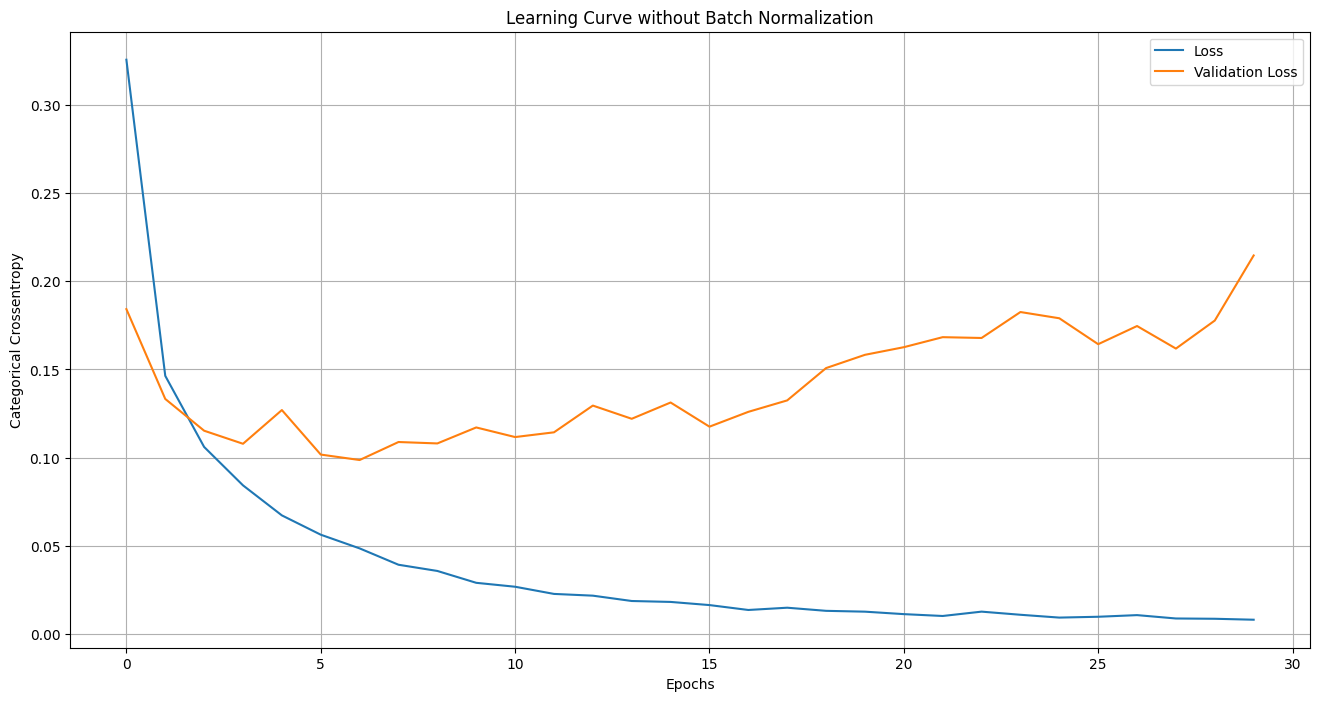

In [23]:
plt.figure(figsize=(16,8))
plt.plot(hist1.history['loss'],label='Loss')
plt.plot(hist1.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve without Batch Normalization')
plt.legend()
plt.grid()
plt.show()

**Plotting the learning curve for Batch normalized model**

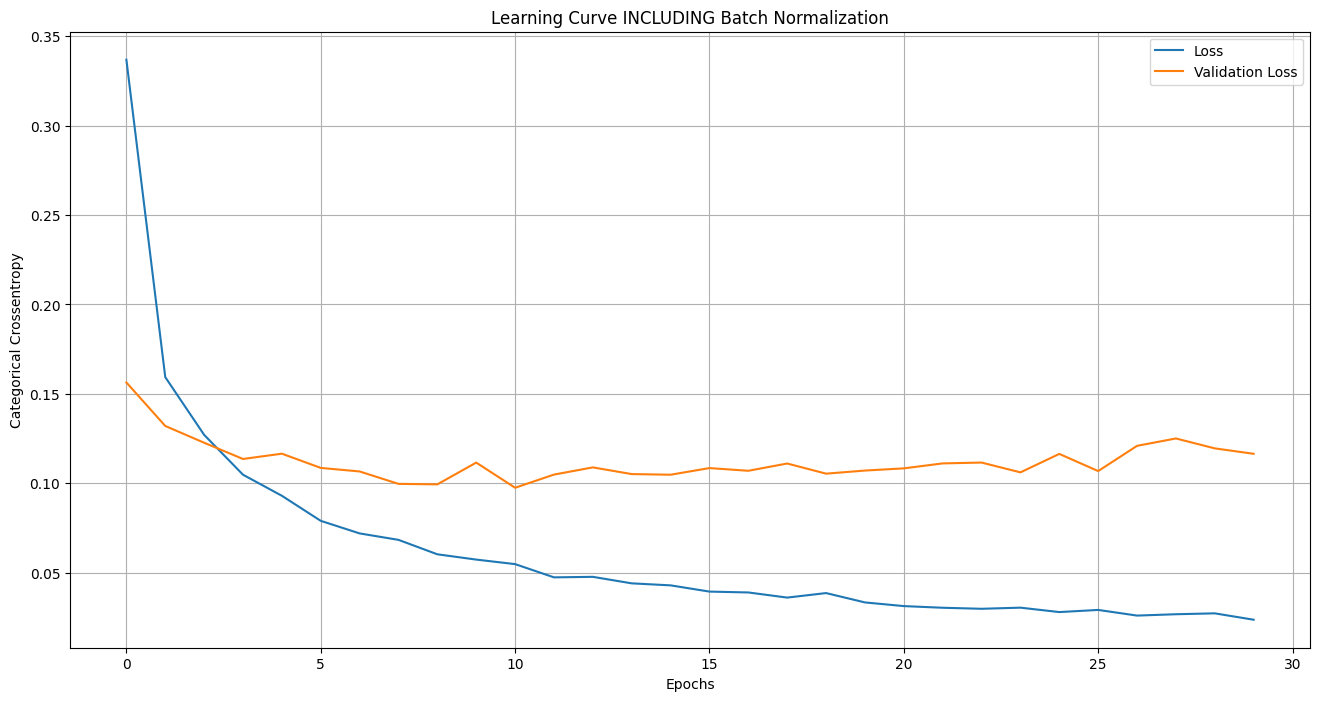

In [24]:
plt.figure(figsize=(16,8))
plt.plot(hist2.history['loss'],label='Loss')
plt.plot(hist2.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve INCLUDING Batch Normalization')
plt.legend()
plt.grid()
plt.show()

### Discuss the impact of batch normalization on the training process and the performance of the neural network.

**Below points were observed in above :-**

1. Reduced Overfitting : By Observing the Learning Curve it is clear that Batch Normalization reduces the overfitting of data
2. Imporved Accuracy : Accuracy of Batch Normalization is better than model without batch normalization
3. Increased Training Time: Time required to train neural network with Batch Normalization increases

## Part 3

### Experimentation and Analysis
1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.
2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

### Experiment with different batch sizes and observe the effect on the training dynamics and model performance.

In [30]:
def plot_learning_curve(hist, batch_size):
    plt.figure(figsize=(16,8))
    plt.plot(hist.history['loss'],label='Loss')
    plt.plot(hist.history['val_loss'],label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Categorical Crossentropy')
    plt.title(f'Learning curve with Batch Size = {batch_size}')
    plt.legend()
    plt.grid()
    plt.show()

Training for batch size = 8


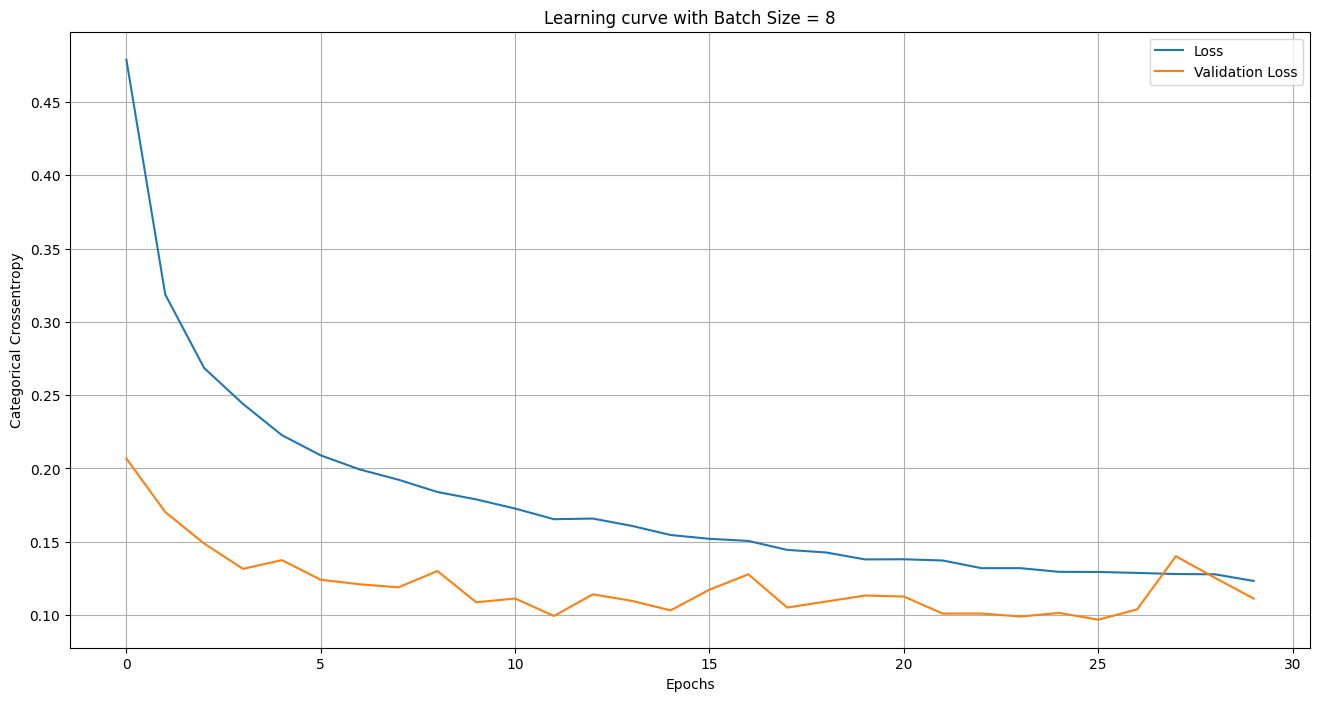

313/313 [==============================] - 0s 618us/step - loss: 0.0967 - accuracy: 0.9718


Training for batch size = 16


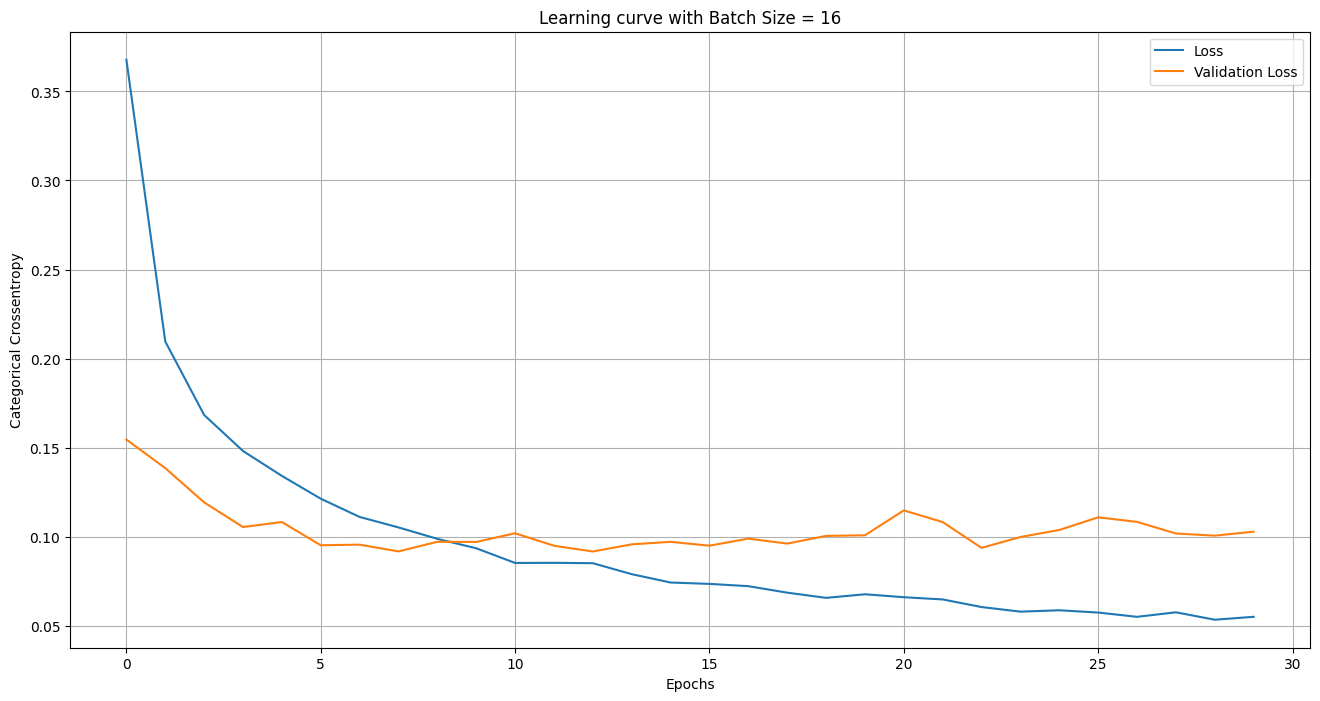

313/313 [==============================] - 0s 586us/step - loss: 0.0886 - accuracy: 0.9786


Training for batch size = 32


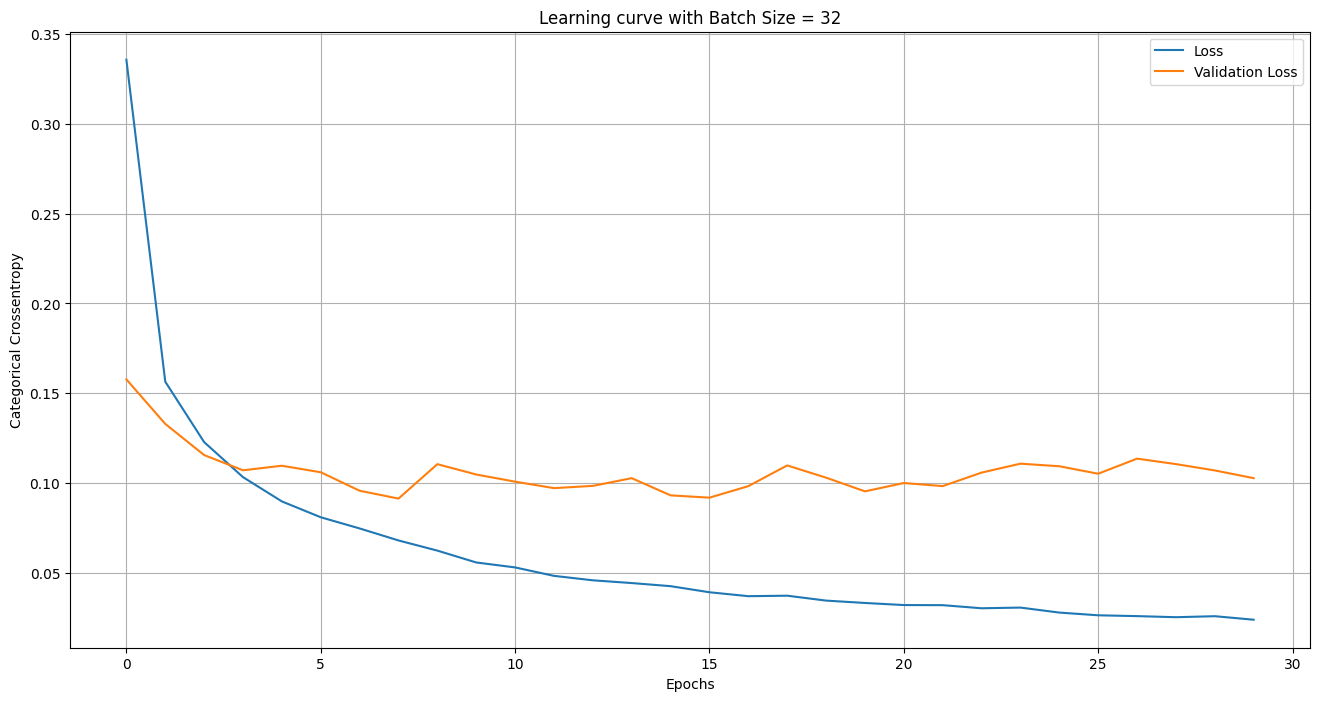

313/313 [==============================] - 0s 581us/step - loss: 0.0983 - accuracy: 0.9759


Training for batch size = 64


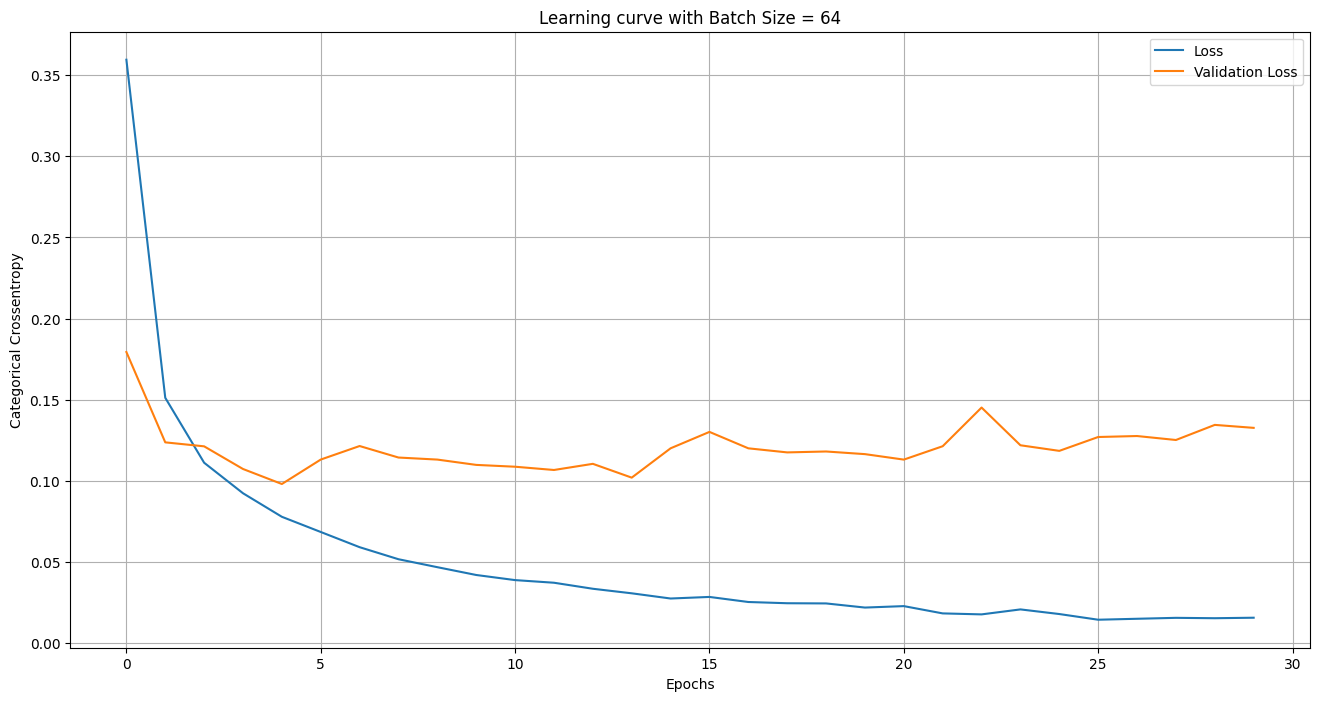

313/313 [==============================] - 0s 815us/step - loss: 0.1147 - accuracy: 0.9752


Training for batch size = 128


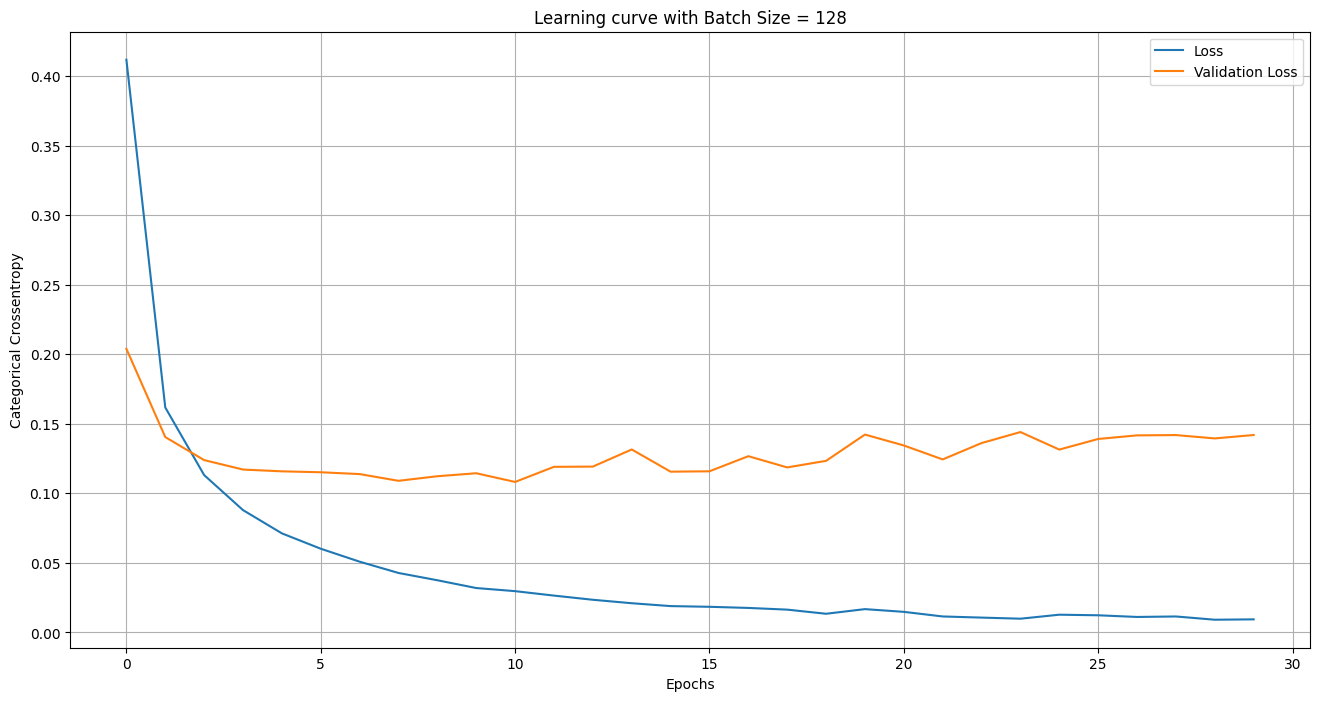

313/313 [==============================] - 0s 575us/step - loss: 0.1441 - accuracy: 0.9691


Training for batch size = 256


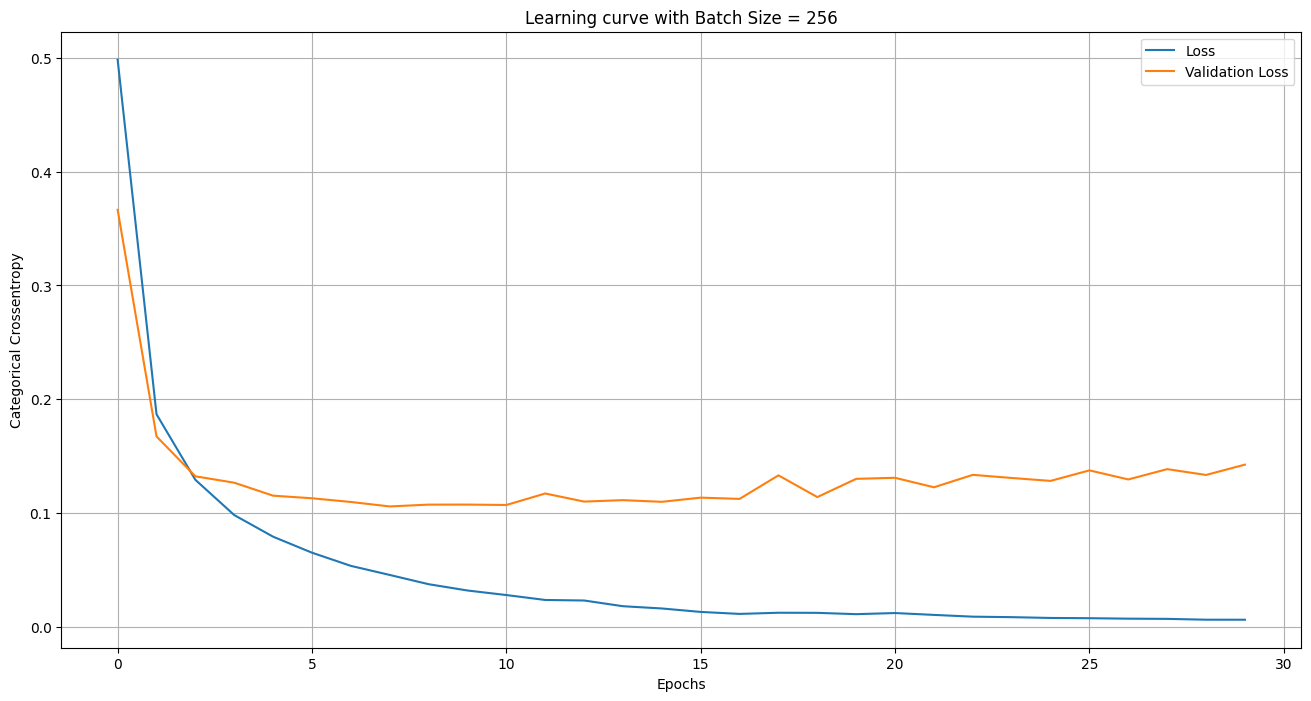

313/313 [==============================] - 0s 578us/step - loss: 0.1508 - accuracy: 0.9685


Training for batch size = 512


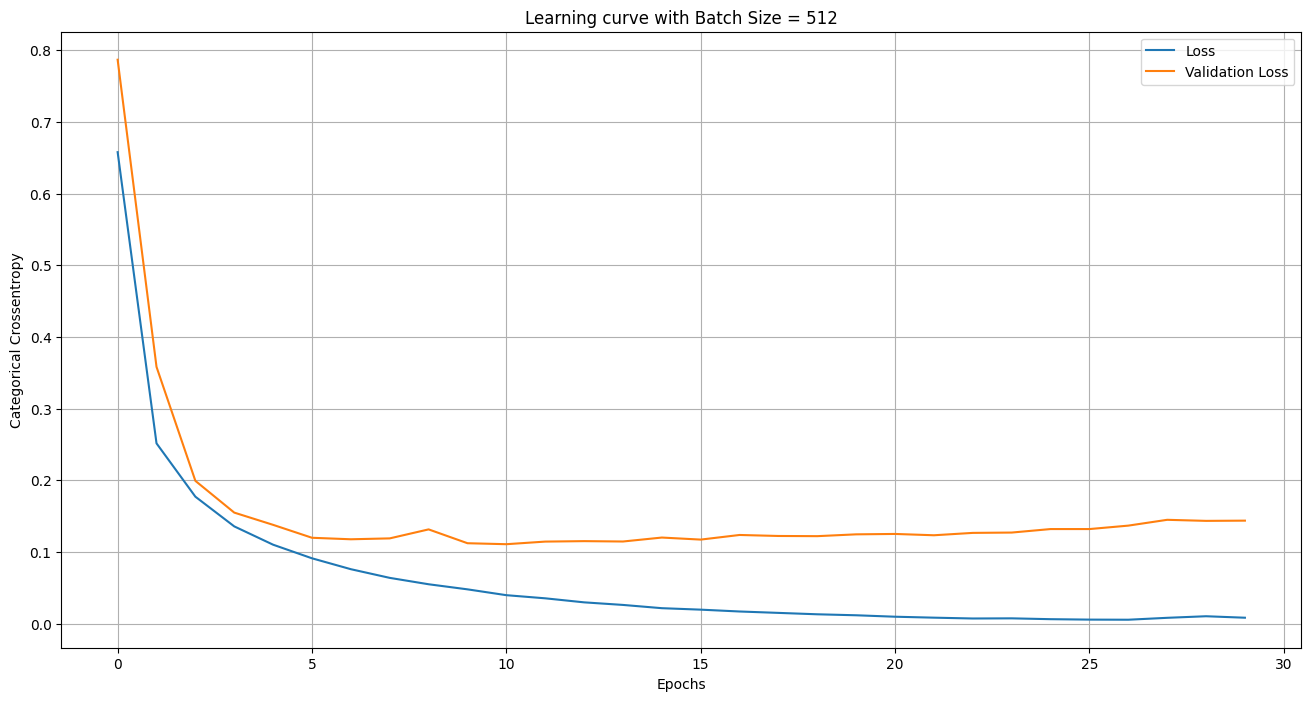

313/313 [==============================] - 0s 569us/step - loss: 0.1370 - accuracy: 0.9694


Training for batch size = 1024


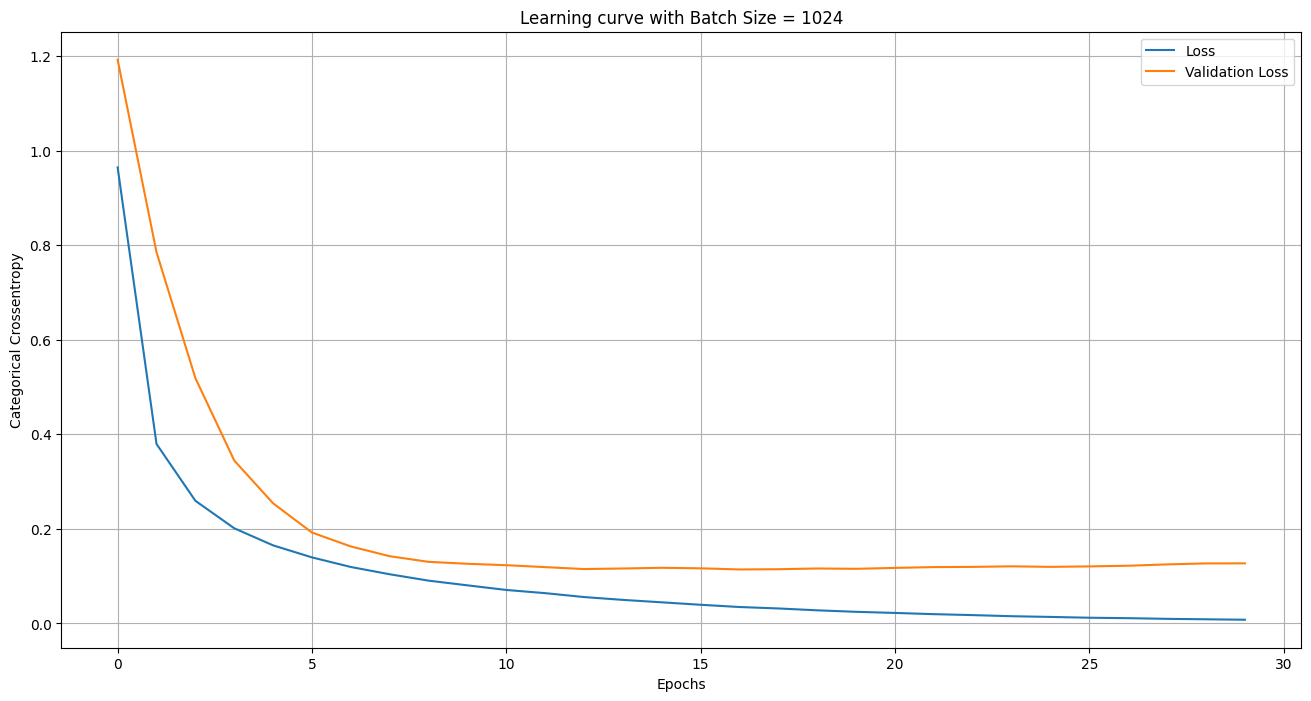

313/313 [==============================] - 0s 590us/step - loss: 0.1180 - accuracy: 0.9677




In [33]:
sizes = [8,16,32,64,128,256,512,1024]
for i in sizes:
    print(f'Training for batch size = {i}')
    # Build Model
    nn = Sequential()
    nn.add(Flatten(input_shape=(28,28,1)))
    nn.add(Dense(64,activation='relu'))
    nn.add(BatchNormalization())
    nn.add(Dense(32,activation='relu'))
    nn.add(BatchNormalization())
    nn.add(Dense(10,activation='softmax'))
    # Compile model
    nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # Fit the model
    histn = nn.fit(X_train,y_train,validation_split=0.2,batch_size=i,epochs=30,verbose=0)
    # Plot learning curve
    plot_learning_curve(histn,i)
    nn.evaluate(X_train,y_train)
    nn.evaluate(X_test,y_test)
    print('\n=======================================================================================\n') 

### **Conclusion : Batch size 16 found as most optimum for this model as test acuracy was highest of 97.68%**

### Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

Batch normalization is a technique used in deep learning to improve the training of neural networks. It involves normalizing the activations of each layer in the network, which can help to stabilize the training process and improve the generalization performance of the network.

There are several advantages to using batch normalization. 

1. First, it can help to reduce the internal covariate shift that occurs during training. This is because batch normalization normalizes the activations of each layer, which helps to ensure that the distribution of the activations remains consistent throughout the training process. This can help to improve the stability of the training process and make it less likely to overfit to the training data.

2. Second, batch normalization can help to improve the generalization performance of neural networks. This is because batch normalization helps to reduce the dependence of the network on the specific training data. By normalizing the activations of each layer, batch normalization helps to ensure that the network is learning features that are generalizable to new data.

3. Third, batch normalization can help to speed up the training process. This is because batch normalization can help to reduce the number of iterations required to train the network. This is because batch normalization helps to stabilize the training process and make it less likely to overfit to the training data.

However, there are also some potential limitations to using batch normalization. 

1. First, batch normalization can increase the computational cost of training a neural network. This is because batch normalization requires the calculation of the mean and variance of the activations of each layer in the network. This can be a significant computational cost, especially for large networks.

2. Second, batch normalization can make it more difficult to train neural networks with small datasets. This is because batch normalization relies on the assumption that the training data is representative of the population from which it was sampled. If the training data is not representative of the population, then batch normalization can actually hurt the performance of the network.

3. Third, batch normalization can make it more difficult to interpret the activations of neural networks. This is because batch normalization normalizes the activations of each layer, which can make it difficult to understand how the network is making decisions.

Overall, batch normalization is a powerful technique that can improve the training of neural networks. However, it is important to be aware of the potential limitations of batch normalization before using it in a particular application.